In [57]:
pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd
import random
from faker import Faker
from random import randrange
from datetime import datetime
from random import shuffle, seed
from faker.providers.person.en import Provider
from google.colab import files
from google.colab import drive
import string
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# USA

## Patients Main 

In [59]:
import pandas as pd
import random
from faker import Faker
from random import randrange
from datetime import datetime
from random import shuffle, seed
from faker.providers.person.en import Provider
from google.colab import files

nr_of_patients = 200
Faker.seed(100)
fake = Faker('en_US')

patients = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for customers_id in range(nr_of_patients):

    #Create p-usa
    x = str(random.randint(1, 1000))
    if len(x) == 1:
      patient_id = "p-usa-"+ "000" + x
    elif len(x) == 2:
      patient_id = "p-usa-"+ "00" + x
    elif len(x) == 3:
      patient_id = "p-usa-"+ "0" + x
    else:
      patient_id = "p-usa-"+ x

    #MRN 
    MRN = str(fake.ean(length=8)[:6])

    #create fist_name
    first_name = fake.first_name()

    #create last_name
    last_name = fake.last_name()
    
    #create gender
    gender = random.choice(["M","F","T"])

    #create contact
    contact = fake_phone_number(fake)
    
    #create dob
    d1 = datetime.strptime(f'1/1/1942', '%d/%m/%Y')
    d2 = datetime.strptime(f'1/1/2022', '%d/%m/%Y')
    dob = fake.date_between(d1, d2)

    #create address
    address = "{" + f"street: '{fake.address()[:10]}', city:'{random.choice(string.ascii_letters[26:])}', state_or_province:'{random.choice(string.ascii_letters[26:])}', zip_code:'{fake.postcode()}', country:'USA'" + "}"
    address = address.replace("-", "{")
    address = address.replace("?", "}")
    #is_resident_patient
    is_resident_patient = random.choice([True, False])

    patients.append([patient_id, MRN, first_name, last_name, gender,contact, dob, address, is_resident_patient])

patients_df = pd.DataFrame(patients, columns=['patient_id','MRN','first_name', 'last_name', 'gender','contact', 'dob','address', 'is_resident_patient']) 
patients_df.drop_duplicates(subset=['patient_id'], keep = 'first', inplace = True)
patients_df = patients_df.set_index ("patient_id")
patients_df.drop_duplicates(subset=['MRN'], keep = 'first', inplace = True)
patients_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_us.csv') 
patients_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_us.csv')
patients_df.head()

,patient_id,MRN,first_name,last_name,gender,contact,dob,address,is_resident_patient
0,p-usa-0479,277265,William,Rodriguez,M,10353432235,1992-05-13,"{street: '7846 Melis', city:'F', state_or_prov...",False
1,p-usa-0480,320376,Claire,Sherman,F,18495858576,1950-06-07,"{street: '643 Wang P', city:'L', state_or_prov...",False
2,p-usa-0070,410934,Christine,Curtis,T,11738193061,1996-07-10,"{street: '780 Martin', city:'X', state_or_prov...",True
3,p-usa-0218,102311,Carl,Bautista,F,17757839946,1961-10-12,"{street: '94641 Jere', city:'K', state_or_prov...",True
4,p-usa-0287,360134,Melissa,Nicholson,M,12109582200,1985-07-10,"{street: '6733 Carol', city:'X', state_or_prov...",True


### Patient Admission

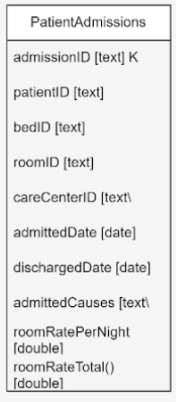

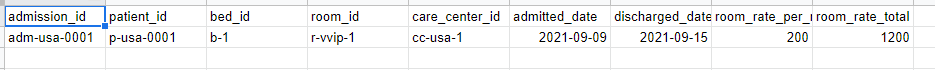

In [60]:
# CREATE TABLE hospital_occupancy.patient_admissions (
#     admission_id TEXT PRIMARY KEY,
#     patient_id TEXT,
#     bed_id TEXT,
#     room_id TEXT,
#     care_center_id TEXT,
#     admitted_date date,
#     discharged_date date,
#     admitted_causes TEXT,
#     room_rate_per_night DOUBLE,
#     room_rate_total DOUBLE)
#     WITH COMMENT = 'Find information about a patient admission';


In [61]:
diagno = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/Diseases/dia_t.csv')
diagno

,did,diagnose
0,1,Abdominal aortic aneurysm (enlarged major bloo...
1,2,Abdominal swelling
2,3,Abdominal trauma
3,4,Abrasions (scrapes)
4,5,ACE inhibitor induced cough blood pressure med...
...,...,...
1161,1529,Triple negative breast cancer
1162,1531,Invasive ductal carcinoma
1163,1533,Invasive lobular carcinoma
1164,1535,Dystonia


In [62]:
from datetime import timedelta  
from scipy.stats import skewnorm

patients_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_us.csv')
rooms_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/rooms_us.csv')
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
beds_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/beds_us.csv')

nr_of_patients = 10000

timeofhostp = skewnorm.rvs(a = 2000,loc=60, size=nr_of_patients)
timeofhostp = timeofhostp - min(timeofhostp) +0.1     #Shift the set so the minimum value is equal to zero.
timeofhostp = timeofhostp / max(timeofhostp)      #Standadize all the vlues between 0 and 1. 
timeofhostp = timeofhostp * 60
timeofhostp = [round(item, 0) for item in timeofhostp]
timeofhostp = list(timeofhostp)

Faker.seed(100)
fake = Faker('en_US')
d1 = datetime.strptime(f'1/1/2012', '%d/%m/%Y')
d2 = datetime.strptime(f'1/1/2022', '%d/%m/%Y')

diagno = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/Diseases/dia_t.csv')
diagno['diagnose'] = diagno['diagnose'].astype("string")
diagno["diagnose"].replace(''," ", regex = True, inplace = True)

patients_admission = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for p_adm in range(nr_of_patients):

    #Create adm-usa
    x = str(random.randint(1, 9999))
    if len(x) == 1:
      admission_id = "adm-usa-"+ "000" + x
    elif len(x) == 2:
      admission_id = "adm-usa-"+ "00" + x
    elif len(x) == 3:
      admission_id = "adm-usa-"+ "0" + x
    else:
      admission_id = "adm-usa-"+ x
    
    #Patientid
    patient_id = random.choice(patients_df["patient_id"])
    
    #BedId
    bed_id = random.choice(beds_df["bed_id"])

    #Roomid
    room_id = random.choice(rooms_df["room_id"])

    #CareCenterid
    care_center_id = random.choice(carecenter_df["careCenterID"])

    #Admitted Date & Discahrge Date
    admitted_date = fake.date_between(d1, d2)
    x = timeofhostp[p_adm]
    discharged_date = admitted_date + timedelta(days = timeofhostp[p_adm])

    admitted_causes = random.choice(diagno['diagnose'])
    
    #room_rate_per_night
    if "1" in care_center_id:
      if "vvip" in room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "VVIP") & (rooms_df["care_center_id"] == "cc-usa-1")]["rate"].values[0]
      elif "vip" in room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "VIP") & (rooms_df["care_center_id"] == "cc-usa-1")]["rate"].values[0]
      elif "iii" in  room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "Class III") & (rooms_df["care_center_id"] == "cc-usa-1")]["rate"].values[0]
      elif "ii" in  room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "Class II") & (rooms_df["care_center_id"] == "cc-usa-1")]["rate"].values[0]
      elif "i" in  room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "Class I") & (rooms_df["care_center_id"] == "cc-usa-1")]["rate"].values[0]
    elif "2" in care_center_id:
      if "vvip" in room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "VVIP") & (rooms_df["care_center_id"] == "cc-usa-2")]["rate"].values[0]
      elif "vip" in room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "VIP") & (rooms_df["care_center_id"] == "cc-usa-2")]["rate"].values[0]
      elif "iii" in  room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "Class III") & (rooms_df["care_center_id"] == "cc-usa-2")]["rate"].values[0]
      elif "ii" in  room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "Class II") & (rooms_df["care_center_id"] == "cc-usa-2")]["rate"].values[0]
      elif "i" in  room_id:
        room_rate_per_night = rooms_df.loc[(rooms_df["room_type"] == "Class I") & (rooms_df["care_center_id"] == "cc-usa-2")]["rate"].values[0]    

    #room_rate_total
    room_rate_total = round(room_rate_per_night*timeofhostp[p_adm],2)
   

    patients_admission.append([admission_id, patient_id, bed_id, room_id, care_center_id, admitted_date,discharged_date, admitted_causes, room_rate_per_night, room_rate_total])

patients_admission_df = pd.DataFrame(patients_admission, columns=['admission_id', 'patient_id','bed_id','room_id', 'care_center_id', 'admitted_date','discharged_date', 'admitted_causes','room_rate_per_night', 'room_rate_total']) 

patients_admission_df.drop_duplicates(subset=['admission_id'], keep = 'first', inplace = True)
patients_admission_df = patients_admission_df.set_index ("admission_id")
patients_admission_df.drop_duplicates(subset=['patient_id', 'admitted_date'], keep = 'first', inplace = True)
patients_admission_df.drop_duplicates(subset=['patient_id', 'discharged_date'], keep = 'first', inplace = True)
patients_admission_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv') 
patients_admission_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv')
patients_admission_df.head()

,admission_id,patient_id,bed_id,room_id,care_center_id,admitted_date,discharged_date,admitted_causes,room_rate_per_night,room_rate_total
0,adm-usa-4263,p-usa-0777,b-usa-825,r-usa-iii-589,cc-usa-1,2014-06-24,2014-07-11,Sarcoma soft tissue cancer,135.42,2302.14
1,adm-usa-1329,p-usa-0293,b-usa-218,r-usa-i-926,cc-usa-2,2019-10-26,2019-11-10,Anemia (low red blood cell count),365.45,5481.75
2,adm-usa-8850,p-usa-0214,b-usa-376,r-usa-vvip-995,cc-usa-2,2019-09-27,2019-10-01,Hematocele collection of blood around testicle,943.95,3775.80
3,adm-usa-1929,p-usa-0684,b-usa-661,r-usa-ii-824,cc-usa-1,2014-12-21,2015-01-07,Methemoglobinemia blood disorder,155.01,2635.17
4,adm-usa-8893,p-usa-0364,b-usa-660,r-usa-vip-509,cc-usa-1,2018-09-08,2018-09-20,Vocal cord paralysis voice box weakness,710.26,8523.12


### patient_admissions_by_room

In [63]:
# CREATE TABLE hospital_occupancy.patient_admissions_by_room (
#     room_id TEXT,
#     admission_id TEXT,
#     patient_id TEXT,
#     bed_id TEXT,
#     care_center_id TEXT,
#     admitted_date date,
#     discharged_date date,
#     admitted_causes TEXT,
#     room_rate_per_night DOUBLE,
#     room_rate_total DOUBLE,
#     PRIMARY KEY ((room_id), admission_id))
#     WITH COMMENT = 'Find patient admissions by room'
#     AND CLUSTERING ORDER BY (admission_id ASC);

In [64]:
from datetime import timedelta  
from scipy.stats import skewnorm

patients_admission_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv')
patients_admission_roomid = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for p_adm in patients_admission_df.index:
    
    #Roomid
    room_id = patients_admission_df['room_id'][p_adm]

    #admission_id
    admission_id = patients_admission_df['admission_id'][p_adm]

    #Patientid
    patient_id = patients_admission_df['patient_id'][p_adm]
    
    #BedId
    bed_id = patients_admission_df['bed_id'][p_adm]

    #CareCenterid
    care_center_id = patients_admission_df['care_center_id'][p_adm]

    #Admitted Date & Discahrge Date
    admitted_date = patients_admission_df['admitted_date'][p_adm]
    discharged_date = patients_admission_df['discharged_date'][p_adm]

    #Admitted_causes
    admitted_causes = patients_admission_df['admitted_causes'][p_adm]
    
    #room_rate_per_night
    room_rate_per_night = patients_admission_df['room_rate_per_night'][p_adm]  

    #room_rate_total
    room_rate_total = patients_admission_df['room_rate_total'][p_adm]  
   

    patients_admission_roomid.append([room_id, admission_id, patient_id, bed_id,care_center_id, admitted_date,discharged_date, admitted_causes, room_rate_per_night, room_rate_total])


patients_admission_roomid_df = pd.DataFrame(patients_admission_roomid, columns=['room_id', 'admission_id', 'patient_id','bed_id', 'care_center_id', 'admitted_date','discharged_date', 'admitted_causes','room_rate_per_night', 'room_rate_total']) 
patients_admission_roomid_df = patients_admission_roomid_df.set_index('room_id')
patients_admission_roomid_df = patients_admission_roomid_df.sort_values(by= 'admission_id')
patients_admission_roomid_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_roomid_us.csv') 
patients_admission_roomid_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_roomid_us.csv')
patients_admission_roomid_df.head()

,room_id,admission_id,patient_id,bed_id,care_center_id,admitted_date,discharged_date,admitted_causes,room_rate_per_night,room_rate_total
0,r-usa-vvip-856,adm-usa-0002,p-usa-0182,b-usa-210,cc-usa-2,2019-11-28,2019-12-04,Gastritis stomach inflammation,943.95,5663.70
1,r-usa-vip-929,adm-usa-0004,p-usa-0541,b-usa-897,cc-usa-1,2013-06-05,2013-06-18,"Sever's disease calcaneal apophysitis, common ...",710.26,9233.38
2,r-usa-iii-10,adm-usa-0005,p-usa-0103,b-usa-467,cc-usa-1,2014-12-20,2014-12-30,Dry air nasal irritation,135.42,1354.20
3,r-usa-i-984,adm-usa-0006,p-usa-0868,b-usa-826,cc-usa-1,2017-01-08,2017-01-10,Bowel obstruction intestinal blockage,331.44,662.88
4,r-usa-vvip-303,adm-usa-0007,p-usa-0888,b-usa-374,cc-usa-1,2017-07-25,2017-07-29,Foot swelling,829.53,3318.12


### patient_admissions_by_carecenter 

In [65]:
# (
#     care_center_id TEXT,
#     admission_id TEXT,
#     patient_id TEXT,
#     bed_id TEXT,
#     room_id TEXT,
#     admitted_date date,
#     discharged_date date,
#     admitted_causes TEXT,
#     room_rate_per_night DOUBLE,
#     room_rate_total DOUBLE,
#     PRIMARY KEY ((care_center_id), admission_id))
#     WITH COMMENT = 'Find patient admissions by care center'
#     AND CLUSTERING ORDER BY (admission_id ASC);

In [66]:
from datetime import timedelta  
from scipy.stats import skewnorm

patients_admission_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv')
patients_admission_carecenterid = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for p_adm in patients_admission_df.index:

    #CareCenterid
    care_center_id = patients_admission_df['care_center_id'][p_adm]  

    #admission_id
    admission_id = patients_admission_df['admission_id'][p_adm]

    #Patientid
    patient_id = patients_admission_df['patient_id'][p_adm]
    
    #BedId
    bed_id = patients_admission_df['bed_id'][p_adm]

    #Roomid
    room_id = patients_admission_df['room_id'][p_adm]

    #Admitted Date & Discahrge Date
    admitted_date = patients_admission_df['admitted_date'][p_adm]
    discharged_date = patients_admission_df['discharged_date'][p_adm]

    #Admitted_causes
    admitted_causes = patients_admission_df['admitted_causes'][p_adm]
    
    #room_rate_per_night
    room_rate_per_night = patients_admission_df['room_rate_per_night'][p_adm]  

    #room_rate_total
    room_rate_total = patients_admission_df['room_rate_total'][p_adm]  
   
    patients_admission_carecenterid.append([care_center_id, admission_id, patient_id, bed_id, room_id, admitted_date,discharged_date, admitted_causes, room_rate_per_night, room_rate_total])

patients_admission_carecenterid_df = pd.DataFrame(patients_admission_carecenterid, columns=['care_center_id', 'admission_id', 'patient_id','bed_id', 'room_id', 'admitted_date','discharged_date', 'admitted_causes','room_rate_per_night', 'room_rate_total']) 
patients_admission_carecenterid_df = patients_admission_carecenterid_df.set_index('care_center_id')
patients_admission_carecenterid_df = patients_admission_carecenterid_df.sort_values(by= 'admission_id')
patients_admission_carecenterid_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_carecenterid_us.csv') 
patients_admission_carecenterid_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_carecenterid_us.csv')
patients_admission_carecenterid_df.head()

,care_center_id,admission_id,patient_id,bed_id,room_id,admitted_date,discharged_date,admitted_causes,room_rate_per_night,room_rate_total
0,cc-usa-2,adm-usa-0002,p-usa-0182,b-usa-210,r-usa-vvip-856,2019-11-28,2019-12-04,Gastritis stomach inflammation,943.95,5663.70
1,cc-usa-1,adm-usa-0004,p-usa-0541,b-usa-897,r-usa-vip-929,2013-06-05,2013-06-18,"Sever's disease calcaneal apophysitis, common ...",710.26,9233.38
2,cc-usa-1,adm-usa-0005,p-usa-0103,b-usa-467,r-usa-iii-10,2014-12-20,2014-12-30,Dry air nasal irritation,135.42,1354.20
3,cc-usa-1,adm-usa-0006,p-usa-0868,b-usa-826,r-usa-i-984,2017-01-08,2017-01-10,Bowel obstruction intestinal blockage,331.44,662.88
4,cc-usa-1,adm-usa-0007,p-usa-0888,b-usa-374,r-usa-vvip-303,2017-07-25,2017-07-29,Foot swelling,829.53,3318.12


### patient_admissions_by_city

In [67]:
# CREATE TABLE hospital_occupancy.patient_admissions_by_city (
#     city TEXT,
#     admission_id TEXT,
#     patient_id TEXT,
#     bed_id TEXT,
#     room_id TEXT,
#     care_center_id TEXT,
#     admitted_date date,
#     discharged_date date,
#     admitted_causes TEXT,
#     room_rate_per_night DOUBLE,
#     room_rate_total DOUBLE,
#     PRIMARY KEY ((city), admission_id))
#     WITH COMMENT = 'Find patient admissions by city'
#     AND CLUSTERING ORDER BY (admission_id ASC);

In [68]:
from datetime import timedelta  
from scipy.stats import skewnorm

patients_admission_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv')
patients_admission_city = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for p_adm in patients_admission_df.index:


    #CareCenterid
    care_center_id = patients_admission_df['care_center_id'][p_adm]  

    #admission_id
    admission_id = patients_admission_df['admission_id'][p_adm]

    #city
    if care_center_id == "cc-usa-1":
      city = carecenter_df['address'][0][29:30]
    elif care_center_id == "cc-usa-2":
      city = carecenter_df['address'][1][29:30]

    #Patientid
    patient_id = patients_admission_df['patient_id'][p_adm]
    
    #BedId
    bed_id = patients_admission_df['bed_id'][p_adm]

    #Roomid
    room_id = patients_admission_df['room_id'][p_adm]

    #Admitted Date & Discahrge Date
    admitted_date = patients_admission_df['admitted_date'][p_adm]
    discharged_date = patients_admission_df['discharged_date'][p_adm]

    #Admitted_causes
    admitted_causes = patients_admission_df['admitted_causes'][p_adm]
    
    #room_rate_per_night
    room_rate_per_night = patients_admission_df['room_rate_per_night'][p_adm]  

    #room_rate_total
    room_rate_total = patients_admission_df['room_rate_total'][p_adm]  
   
    patients_admission_city.append([city,  admission_id, patient_id, bed_id, room_id, care_center_id, admitted_date,discharged_date, admitted_causes, room_rate_per_night, room_rate_total])

patients_admission_city_df = pd.DataFrame(patients_admission_city, columns=['city', 'admission_id', 'patient_id','bed_id', 'room_id','care_center_id', 'admitted_date','discharged_date', 'admitted_causes','room_rate_per_night', 'room_rate_total']) 
patients_admission_city_df = patients_admission_city_df.set_index('city')
patients_admission_city_df = patients_admission_city_df.sort_values(by= 'admission_id')
patients_admission_city_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_city_us.csv') 
patients_admission_city_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_city_us.csv')
patients_admission_city_df.head()

,city,admission_id,patient_id,bed_id,room_id,care_center_id,admitted_date,discharged_date,admitted_causes,room_rate_per_night,room_rate_total
0,H,adm-usa-0002,p-usa-0182,b-usa-210,r-usa-vvip-856,cc-usa-2,2019-11-28,2019-12-04,Gastritis stomach inflammation,943.95,5663.70
1,G,adm-usa-0004,p-usa-0541,b-usa-897,r-usa-vip-929,cc-usa-1,2013-06-05,2013-06-18,"Sever's disease calcaneal apophysitis, common ...",710.26,9233.38
2,G,adm-usa-0005,p-usa-0103,b-usa-467,r-usa-iii-10,cc-usa-1,2014-12-20,2014-12-30,Dry air nasal irritation,135.42,1354.20
3,G,adm-usa-0006,p-usa-0868,b-usa-826,r-usa-i-984,cc-usa-1,2017-01-08,2017-01-10,Bowel obstruction intestinal blockage,331.44,662.88
4,G,adm-usa-0007,p-usa-0888,b-usa-374,r-usa-vvip-303,cc-usa-1,2017-07-25,2017-07-29,Foot swelling,829.53,3318.12


### patient_admission_by_state

In [69]:
from datetime import timedelta  
from scipy.stats import skewnorm

patients_admission_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv')
patients_admission_state = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for p_adm in patients_admission_df.index:

    #CareCenterid
    care_center_id = patients_admission_df['care_center_id'][p_adm]  

    #admission_id
    admission_id = patients_admission_df['admission_id'][p_adm]

    #city
    if care_center_id == "cc-usa-1":
      state = carecenter_df['address'][0][52:53]
    elif care_center_id == "cc-usa-2":
      state = carecenter_df['address'][1][52:53]

    #Patientid
    patient_id = patients_admission_df['patient_id'][p_adm]
    
    #BedId
    bed_id = patients_admission_df['bed_id'][p_adm]

    #Roomid
    room_id = patients_admission_df['room_id'][p_adm]

    #Admitted Date & Discahrge Date
    admitted_date = patients_admission_df['admitted_date'][p_adm]
    discharged_date = patients_admission_df['discharged_date'][p_adm]

    #Admitted_causes
    admitted_causes = patients_admission_df['admitted_causes'][p_adm]
    
    #room_rate_per_night
    room_rate_per_night = patients_admission_df['room_rate_per_night'][p_adm]  

    #room_rate_total
    room_rate_total = patients_admission_df['room_rate_total'][p_adm]  
   
    patients_admission_state.append([state,  admission_id, patient_id, bed_id, room_id, care_center_id, admitted_date,discharged_date, admitted_causes, room_rate_per_night, room_rate_total])

patients_admission_state_df = pd.DataFrame(patients_admission_state, columns=['state', 'admission_id', 'patient_id','bed_id', 'room_id','care_center_id', 'admitted_date','discharged_date', 'admitted_causes','room_rate_per_night', 'room_rate_total']) 
patients_admission_state_df = patients_admission_state_df.set_index('state')
patients_admission_state_df = patients_admission_state_df.sort_values(by= 'admission_id')
patients_admission_state_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_state_us.csv') 
patients_admission_state_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_state_us.csv')
patients_admission_state_df.head()

,state,admission_id,patient_id,bed_id,room_id,care_center_id,admitted_date,discharged_date,admitted_causes,room_rate_per_night,room_rate_total
0,G,adm-usa-0002,p-usa-0182,b-usa-210,r-usa-vvip-856,cc-usa-2,2019-11-28,2019-12-04,Gastritis stomach inflammation,943.95,5663.70
1,B,adm-usa-0004,p-usa-0541,b-usa-897,r-usa-vip-929,cc-usa-1,2013-06-05,2013-06-18,"Sever's disease calcaneal apophysitis, common ...",710.26,9233.38
2,B,adm-usa-0005,p-usa-0103,b-usa-467,r-usa-iii-10,cc-usa-1,2014-12-20,2014-12-30,Dry air nasal irritation,135.42,1354.20
3,B,adm-usa-0006,p-usa-0868,b-usa-826,r-usa-i-984,cc-usa-1,2017-01-08,2017-01-10,Bowel obstruction intestinal blockage,331.44,662.88
4,B,adm-usa-0007,p-usa-0888,b-usa-374,r-usa-vvip-303,cc-usa-1,2017-07-25,2017-07-29,Foot swelling,829.53,3318.12


### patient_admission_by_country

In [70]:
# CREATE TABLE hospital_occupancy.patient_admissions_by_country (
#     country TEXT,
#     admission_id TEXT,
#     patient_id TEXT,
#     bed_id TEXT,
#     room_id TEXT,
#     care_center_id TEXT,
#     admitted_date date,
#     discharged_date date,
#     admitted_causes TEXT,
#     room_rate_per_night DOUBLE,
#     room_rate_total DOUBLE,
#     PRIMARY KEY ((country), admission_id))
#     WITH COMMENT = 'Find patient admissions by country'
#     AND CLUSTERING ORDER BY (admission_id ASC);

In [71]:
from datetime import timedelta  
from scipy.stats import skewnorm

patients_admission_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_us.csv')
patients_admission_country = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for p_adm in patients_admission_df.index:

    #CareCenterid
    care_center_id = patients_admission_df['care_center_id'][p_adm]  

    #admission_id
    admission_id = patients_admission_df['admission_id'][p_adm]

    #city
    if care_center_id == "cc-usa-1":
      country = carecenter_df['address'][0][82:85]
    elif care_center_id == "cc-usa-2":
      country = carecenter_df['address'][1][82:85]

    #Patientid
    patient_id = patients_admission_df['patient_id'][p_adm]
    
    #BedId
    bed_id = patients_admission_df['bed_id'][p_adm]

    #Roomid
    room_id = patients_admission_df['room_id'][p_adm]

    #Admitted Date & Discahrge Date
    admitted_date = patients_admission_df['admitted_date'][p_adm]
    discharged_date = patients_admission_df['discharged_date'][p_adm]

    #Admitted_causes
    admitted_causes = patients_admission_df['admitted_causes'][p_adm]
    
    #room_rate_per_night
    room_rate_per_night = patients_admission_df['room_rate_per_night'][p_adm]  

    #room_rate_total
    room_rate_total = patients_admission_df['room_rate_total'][p_adm]  
   
    patients_admission_country.append([country,  admission_id, patient_id, bed_id, room_id, care_center_id, admitted_date,discharged_date, admitted_causes, room_rate_per_night, room_rate_total])

patients_admission_country_df = pd.DataFrame(patients_admission_country, columns=['country', 'admission_id', 'patient_id','bed_id', 'room_id','care_center_id', 'admitted_date','discharged_date', 'admitted_causes','room_rate_per_night', 'room_rate_total']) 
patients_admission_country_df = patients_admission_country_df.set_index('country')
patients_admission_country_df = patients_admission_country_df.sort_values(by= 'admission_id')
patients_admission_country_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_country_us.csv') 
patients_admission_country_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/patients_admission_country_us.csv')
patients_admission_country_df.head()

,country,admission_id,patient_id,bed_id,room_id,care_center_id,admitted_date,discharged_date,admitted_causes,room_rate_per_night,room_rate_total
0,USA,adm-usa-0002,p-usa-0182,b-usa-210,r-usa-vvip-856,cc-usa-2,2019-11-28,2019-12-04,Gastritis stomach inflammation,943.95,5663.70
1,USA,adm-usa-0004,p-usa-0541,b-usa-897,r-usa-vip-929,cc-usa-1,2013-06-05,2013-06-18,"Sever's disease calcaneal apophysitis, common ...",710.26,9233.38
2,USA,adm-usa-0005,p-usa-0103,b-usa-467,r-usa-iii-10,cc-usa-1,2014-12-20,2014-12-30,Dry air nasal irritation,135.42,1354.20
3,USA,adm-usa-0006,p-usa-0868,b-usa-826,r-usa-i-984,cc-usa-1,2017-01-08,2017-01-10,Bowel obstruction intestinal blockage,331.44,662.88
4,USA,adm-usa-0007,p-usa-0888,b-usa-374,r-usa-vvip-303,cc-usa-1,2017-07-25,2017-07-29,Foot swelling,829.53,3318.12


## Rooms Main

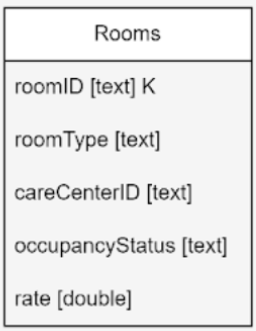

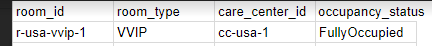

In [72]:
the_price = []
for price in carecenter_df.index+1:
  vvip = round(random.uniform(750.0, 1000.0),2)
  vip = round(random.uniform(500.0, 750.0),2)
  i = round(random.uniform(250.0, 500.0),2)
  ii = round(random.uniform(150.0, 250.0),2)
  iii = round(random.uniform(50.0, 150.0),2)

  the_price.append([vvip, vip, i, ii, iii])

In [73]:
the_price

[[859.97, 736.73, 379.84, 151.57, 91.89],
 [859.29, 595.27, 401.18, 194.16, 85.97]]

In [74]:
nr_of_rooms = 200
Faker.seed(100)
fake = Faker('en_US')
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
rooms = []
the_price = []

for price in carecenter_df.index:
  vvip = round(random.uniform(750.0, 1000.0),2)
  vip = round(random.uniform(500.0, 750.0),2)
  i = round(random.uniform(250.0, 500.0),2)
  ii = round(random.uniform(150.0, 250.0),2)
  iii = round(random.uniform(50.0, 150.0),2)
  the_price.append([vvip, vip, i, ii, iii])

for rooms_n in range(nr_of_rooms):
  #Room type
  room_type = random.choice(["VVIP", "VIP", "Class I", "Class II", "Class III"])
  
  #Room id
  if room_type == "VVIP":
    room_id = "r-usa-vvip-" + str(random.randint(1, 1000))
  elif room_type == "VIP":
    room_id = "r-usa-vip-" + str(random.randint(1, 1000))
  elif room_type == "Class I":
    room_id = "r-usa-i-" + str(random.randint(1, 1000))
  elif room_type == "Class II":
    room_id = "r-usa-ii-" + str(random.randint(1, 1000))
  elif room_type == "Class III":
    room_id = "r-usa-iii-" + str(random.randint(1, 1000))

  #care_center_id
  care_center_id = random.choice(carecenter_df["careCenterID"])

    #Rate
  if care_center_id[7] == "1":
    if room_type == "VVIP":
      rate = the_price[0][0]
    elif room_type == "VIP":
      rate = the_price[0][1]
    elif room_type == "Class I":
      rate = the_price[0][2]
    elif room_type == "Class II":
      rate = the_price[0][3]
    elif room_type == "Class III":
      rate = the_price[0][4]
  elif care_center_id[7] == "2":
    if room_type == "VVIP":
      rate = the_price[1][0]
    elif room_type == "VIP":
      rate = the_price[1][1]
    elif room_type == "Class I":
      rate = the_price[1][2]
    elif room_type == "Class II":
      rate = the_price[1][3]
    elif room_type == "Class III":
      rate = the_price[1][4]

  rooms.append([room_id, room_type, care_center_id, rate])

rooms_df = pd.DataFrame(rooms, columns=['room_id','room_type','care_center_id', 'rate']) 
rooms_df.drop_duplicates(subset=['room_id', 'care_center_id'], keep = 'first', inplace = True)
rooms_df = rooms_df.set_index('room_id')
rooms_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/rooms_us.csv') 
rooms_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/rooms_us.csv')
rooms_df.head(15)

,room_id,room_type,care_center_id,rate
0,r-usa-ii-153,Class II,cc-usa-2,214.66
1,r-usa-vip-168,VIP,cc-usa-2,623.73
2,r-usa-vip-209,VIP,cc-usa-2,623.73
3,r-usa-vip-458,VIP,cc-usa-1,609.20
4,r-usa-ii-569,Class II,cc-usa-1,165.23
5,r-usa-iii-210,Class III,cc-usa-2,137.51
6,r-usa-vip-899,VIP,cc-usa-2,623.73
7,r-usa-iii-522,Class III,cc-usa-1,53.36
8,r-usa-i-406,Class I,cc-usa-2,494.84
9,r-usa-ii-838,Class II,cc-usa-1,165.23


### rooms_by_carecenter 

In [75]:
rooms_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/rooms_us.csv')
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')

rooms_by_carecenter = []
for i in rooms_df.index:
  care_center_id = rooms_df['care_center_id'][i]
  room_id = rooms_df['room_id'][i]
  room_type = rooms_df['room_type'][i]
  rate = rooms_df['rate'][i]

  rooms_by_carecenter.append([care_center_id, room_id, room_type, rate])

rooms_by_carecenter_df = pd.DataFrame(rooms_by_carecenter, columns=['care_center_id','room_id','room_type', 'rate']) 
rooms_by_carecenter_df = rooms_by_carecenter_df.set_index('care_center_id')
rooms_by_carecenter_df = rooms_by_carecenter_df.sort_values(by= 'room_id')
rooms_by_carecenter_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/care_address_us.csv') 
rooms_by_carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/care_address_us.csv')
rooms_by_carecenter_df.head()

,care_center_id,room_id,room_type,rate
0,cc-usa-1,r-usa-i-119,Class I,410.26
1,cc-usa-1,r-usa-i-140,Class I,410.26
2,cc-usa-1,r-usa-i-185,Class I,410.26
3,cc-usa-2,r-usa-i-272,Class I,494.84
4,cc-usa-2,r-usa-i-273,Class I,494.84


## Beds Main

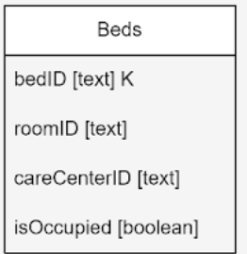

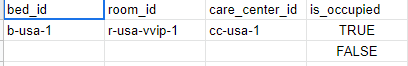

In [76]:
nr_of_beds = 500
fake = Faker('en_US')
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
rooms_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/rooms_us.csv')
beds = []

for bedsn in range(nr_of_beds):
  #bed_id
  
  bed_id = "b-usa-" + str(random.randint(1, 1000))

  #room_id
  room_id = random.choice(rooms_df["room_id"])

  #care_center_id
  care_center_id = random.choice(carecenter_df["careCenterID"])

  beds.append([bed_id, room_id, care_center_id])


beds_df = pd.DataFrame(beds, columns=['bed_id','room_id','care_center_id']) 
beds_df.drop_duplicates(subset=['bed_id', 'care_center_id'], keep = 'first', inplace = True)
beds_df = beds_df.set_index('bed_id')
beds_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/beds_us.csv') 
beds_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/beds_us.csv')
beds_df.head()

,bed_id,room_id,care_center_id
0,b-usa-960,r-usa-ii-159,cc-usa-1
1,b-usa-291,r-usa-vip-323,cc-usa-2
2,b-usa-683,r-usa-i-782,cc-usa-1
3,b-usa-289,r-usa-ii-876,cc-usa-2
4,b-usa-364,r-usa-vvip-476,cc-usa-2


### beds_by_room 

In [77]:
beds_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/beds_us.csv')

beds_by_room = []
for i in beds_df.index:
  room_id = beds_df['room_id'][i]
  bed_id = beds_df['bed_id'][i]
  care_center_id = beds_df['care_center_id'][i]

  beds_by_room.append([room_id, bed_id, care_center_id])

beds_by_room_df = pd.DataFrame(beds_by_room, columns=['room_id', 'bed_id','care_center_id']) 
beds_by_room_df = beds_by_room_df.set_index ("room_id")
beds_by_room_df = beds_by_room_df.sort_values(by= 'bed_id')
beds_by_room_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/beds_by_room_us.csv') 
beds_by_room_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/beds_by_room_us.csv')
beds_by_room_df.head()

,room_id,bed_id,care_center_id
0,r-usa-i-456,b-usa-1000,cc-usa-2
1,r-usa-iii-340,b-usa-101,cc-usa-1
2,r-usa-i-899,b-usa-103,cc-usa-2
3,r-usa-vip-458,b-usa-106,cc-usa-2
4,r-usa-i-58,b-usa-109,cc-usa-2


## CareCenters Main

In [78]:
nr_of_CareCenters = 2
fake = Faker('en_US')

carecenter = []
def fake_phone_number(fake: Faker) -> str:
    return f'+1{fake.msisdn()[3:]}'

for x in range(nr_of_CareCenters):
  #Create careCenterID
    careCenterID = f"cc-usa-{x+1}"
    #Create careCenterName
    if x == 1:
      careCenterName = "MedStar MVCH"
    else: 
      careCenterName = "Global Health MVCH"
    #Create address
    address = "{" + f"street: '{fake.address()[:10]}', city:'{random.choice(string.ascii_letters[26:])}', state_or_province:'{random.choice(string.ascii_letters[26:])}',zip_code:'{fake.postcode()}', country:'USA'" + "}"

    carecenter.append([careCenterID, careCenterName, address])

carecenter = pd.DataFrame(carecenter, columns=['careCenterID','careCenterName','address']) 
carecenter = carecenter.set_index ("careCenterID")
carecenter.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv') 
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
carecenter_df.head()

,careCenterID,careCenterName,address
0,cc-usa-1,Global Health MVCH,"{street: '65681 Chri', city:'B', state_or_prov..."
1,cc-usa-2,MedStar MVCH,"{street: '6367 Santa', city:'D', state_or_prov..."


### CareCenters_by_city

In [79]:
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
nr_of_CareCenters = 2
carecenters_by_city = []
for i in range(nr_of_CareCenters):
  city = carecenter_df['address'][i][29:30]
  care_center_id = carecenter_df['careCenterID'][i]
  care_center_name = carecenter_df['careCenterName'][i]
  address = carecenter_df['address'][i]
  
  carecenters_by_city.append([city, care_center_id, care_center_name, address])

carecenters_by_city_df = pd.DataFrame(carecenters_by_city, columns=['city','care_center_id','care_center_name', 'address']) 
carecenters_by_city_df = carecenters_by_city_df.set_index ("city")
carecenters_by_city_df = carecenters_by_city_df.sort_values(by= 'care_center_id')
carecenters_by_city_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_by_city_us.csv') 
carecenters_by_city_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_by_city_us.csv')
carecenters_by_city_df.head()

,city,care_center_id,care_center_name,address
0,B,cc-usa-1,Global Health MVCH,"{street: '65681 Chri', city:'B', state_or_prov..."
1,D,cc-usa-2,MedStar MVCH,"{street: '6367 Santa', city:'D', state_or_prov..."


### CareCenters_by_state

In [80]:
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
nr_of_CareCenters = 2
carecenters_by_state = []
for i in range(nr_of_CareCenters):
  state = carecenter_df['address'][i][52:53]
  care_center_id = carecenter_df['careCenterID'][i]
  care_center_name = carecenter_df['careCenterName'][i]
  address = carecenter_df['address'][i]
  
  carecenters_by_state.append([state, care_center_id, care_center_name, address])

carecenters_by_state_df = pd.DataFrame(carecenters_by_state, columns=['state','care_center_id','care_center_name', 'address']) 
carecenters_by_state_df = carecenters_by_state_df.set_index ("state")
carecenters_by_state_df = carecenters_by_state_df.sort_values(by= 'care_center_id')
carecenters_by_state_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_by_state_us.csv') 
carecenters_by_state_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_by_state_us.csv')
carecenters_by_state_df.head()

,state,care_center_id,care_center_name,address
0,T,cc-usa-1,Global Health MVCH,"{street: '65681 Chri', city:'B', state_or_prov..."
1,I,cc-usa-2,MedStar MVCH,"{street: '6367 Santa', city:'D', state_or_prov..."


### CareCenters_by_Country

In [81]:
carecenter_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_us.csv')
nr_of_CareCenters = 2
carecenters_by_country = []
for i in range(nr_of_CareCenters):
  country = carecenter_df['address'][i][82:85]
  care_center_id = carecenter_df['careCenterID'][i]
  care_center_name = carecenter_df['careCenterName'][i]
  address = carecenter_df['address'][i]
  
  carecenters_by_country.append([country, care_center_id, care_center_name, address])

carecenters_by_country_df = pd.DataFrame(carecenters_by_country, columns=['country','care_center_id','care_center_name', 'address']) 
carecenters_by_country_df = carecenters_by_country_df.set_index ("country")
carecenters_by_country_df = carecenters_by_country_df.sort_values(by= 'care_center_id')
carecenters_by_country_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_by_state_us.csv') 
carecenters_by_country_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/carecenter_by_state_us.csv')
carecenters_by_country_df.head()

,country,care_center_id,care_center_name,address
0,USA,cc-usa-1,Global Health MVCH,"{street: '65681 Chri', city:'B', state_or_prov..."
1,USA,cc-usa-2,MedStar MVCH,"{street: '6367 Santa', city:'D', state_or_prov..."


### CareCenters Address

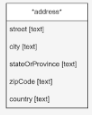

In [82]:
care_address = []
for i in range(nr_of_CareCenters):
  street = carecenter_df['address'][i][10:20]
  city = carecenter_df['address'][i][29:30]
  stateOfProvince = carecenter_df['address'][i][52:53]
  zipCode = carecenter_df['address'][i][65:70]
  country = carecenter_df['address'][i][82:85]

  care_address.append([street, city, stateOfProvince, zipCode, country])

care_address_df = pd.DataFrame(care_address, columns=['street','city','stateOfProvince', 'zipCode', 'country']) 
care_address_df = care_address_df.set_index ("street")
# care_address_df = care_address_df.sort_values(by= 'care_center_id')
care_address_df.to_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/care_address_us.csv') 
care_address_df = pd.read_csv('/content/drive/MyDrive/Semester I/Data Modelling & Management/Datasets/care_address_us.csv')
care_address_df.head()

,street,city,stateOfProvince,zipCode,country
0,65681 Chri,B,T,18960,USA
1,6367 Santa,D,I,22391,USA


In [83]:
carecenter_df['address'][0]

"{street: '65681 Chri', city:'B', state_or_province:'T',zip_code:'18960', country:'USA'}"

In [84]:
carecenter_df['address'][0][82:85]

'USA'